In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

### Insect Spray data

In [2]:
data_df = pd.read_csv('../data/InsectSprays.csv', usecols=[1,2])

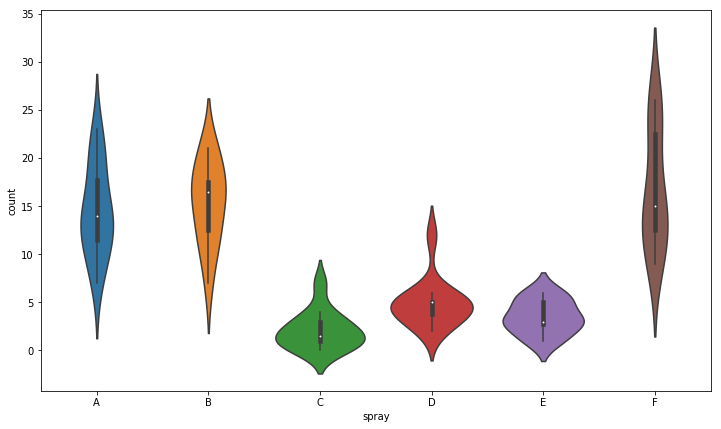

In [3]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.violinplot(x='spray', y='count', data=data_df, )

### Regression with dummy variables

In [4]:
formula = 'count ~ spray'
lm = smf.ols(formula, data=data_df).fit()

In [5]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     34.70
Date:                Mon, 25 Feb 2019   Prob (F-statistic):           3.18e-17
Time:                        14:50:03   Log-Likelihood:                -197.42
No. Observations:                  72   AIC:                             406.8
Df Residuals:                      66   BIC:                             420.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.5000      1.132     12.807      0.000      12.240      16.760
spray[T.B]     0.8333      1.601      0.520      0.604      -2.363       4.030
spray[T.C]   -12.4167      1.601     -7.755      0.000     -15.613      -9.220
spray[T.D]    -9.5833      1.601     -5.985      0.000     -12.780      -6.387
spray[T.E]   -11.0000      1.601     -6.870      0.000     -14.197      -7.803
spray[T.F]     2.1667      1.601      1.353      0.181      -1.030       5.363
==============================================================================
Omnibus:                        3.201   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                2.421
Skew:                           0.411   Prob(JB):                        0.298
Kurtosis:                       3.360   Cond. No.                         6.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
coef_table = lm.summary().tables[1]
coef_table

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,14.5000,1.132,12.807,0.000,12.240,16.760
spray[T.B],0.8333,1.601,0.520,0.604,-2.363,4.030
spray[T.C],-12.4167,1.601,-7.755,0.000,-15.613,-9.220
spray[T.D],-9.5833,1.601,-5.985,0.000,-12.780,-6.387
spray[T.E],-11.0000,1.601,-6.870,0.000,-14.197,-7.803
spray[T.F],2.1667,1.601,1.353,0.181,-1.030,5.363


### Same regression using Pandas dummies

In [7]:
categorical_col = 'spray'

dummy_var = pd.get_dummies(data_df[categorical_col], prefix='spray', drop_first=True)
categorical_col_names = dummy_var.columns.values
data_with_dummies = pd.concat([data_df, dummy_var], axis=1).drop(categorical_col, axis=1)

In [8]:
formula = 'count ~ ' + ' + '.join(data_with_dummies.columns.difference(['count']))
lm1 = smf.ols(formula, data=data_with_dummies).fit()
lm1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,14.5000,1.132,12.807,0.000,12.240,16.760
spray_B,0.8333,1.601,0.520,0.604,-2.363,4.030
spray_C,-12.4167,1.601,-7.755,0.000,-15.613,-9.220
spray_D,-9.5833,1.601,-5.985,0.000,-12.780,-6.387
spray_E,-11.0000,1.601,-6.870,0.000,-14.197,-7.803
spray_F,2.1667,1.601,1.353,0.181,-1.030,5.363
